IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Guillaume DUPART - Yanis TOUTAIN

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

import graphviz as gv

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [3]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
newsgroups_df2 = pd.read_csv("data/20newsgroups.csv")
newsgroups_df

,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [4]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


In [5]:
newsgroups_df["messages"] = newsgroups_df["messages"].fillna("")
newsgroups_df["les_mots"] = newsgroups_df["messages"].apply(ut.text2vect, args=(stop_words_df["stopword"].tolist(),))
newsgroups_df2["messages"] = newsgroups_df["messages"].fillna("")
newsgroups_df2["les_mots"] = newsgroups_df["messages"].apply(ut.text2vect, args=([],))
newsgroups_df

,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[sure, bashers, pens, fans, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,"[brother, market, high, performance, video, ca..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, said, dream, mediterranean, new, are..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, scsi, card, dma, transfers, disks, scs..."
4,1) I have an old Jasmine drive which I cann...,4,"[1, old, jasmine, drive, cannot, use, new, sys..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[isolated, ground, recepticles, usually, unusu..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[installed, dx2, 66, cpu, clone, motherboard, ..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[require, hyper, sphere, 3, space, 4, points, ..."


## Construction du dataset d'apprentissage et de test

In [25]:
# pourcentage d'exemples de chaque classe à garder:
taux_app = 0.01    # ici on prend 1% 
taux_test = 0.05 # Taux pour le df de test à 5%
les_labels = newsgroups_df['target'].unique()
les_labels2 = newsgroups_df2['target'].unique()
# déclaration des variables qui seront initialisées dans la boucle:
df_train = []  
df_test = []
for l in les_labels:
    les_ids = newsgroups_df[newsgroups_df['target'] == l].index.to_list()
    np.random.shuffle(les_ids)
    
    nb_total = len(les_ids)
    nb_app = int(nb_total * taux_app)
    nb_test = int(nb_total * taux_test)

    ids_app = les_ids[:nb_app]
    ids_test = les_ids[nb_app:nb_app + nb_test]

    df_train.append(newsgroups_df.loc[ids_app])
    df_test.append(newsgroups_df.loc[ids_test])

df_train = pd.concat(df_train)
df_test = pd.concat(df_test)

# ###########################################################

# déclaration des variables qui seront initialisées dans la boucle:
df_train2 = []  
df_test2 = []
for l in les_labels2:
    les_ids = newsgroups_df2[newsgroups_df2['target'] == l].index.to_list()
    np.random.shuffle(les_ids)

    nb_total = len(les_ids)
    nb_app = int(nb_total * taux_app)
    nb_test = int(nb_total * taux_test)

    ids_app = les_ids[:nb_app]
    ids_test = les_ids[nb_app:nb_app + nb_test]

    df_train2.append(newsgroups_df2.loc[ids_app])
    df_test2.append(newsgroups_df2.loc[ids_test])

df_train2 = pd.concat(df_train2)
df_test2 = pd.concat(df_test2)

##############################################################

# Résultat:
print(f"Dimension de df_train:\t{df_train.shape}")
print(f"Dimension de df_test:\t{df_test.shape}")
print(f"Dimension de df_train:\t{df_train2.shape}")
print(f"Dimension de df_test:\t{df_test2.shape}")

Dimension de df_train:	(173, 3)
Dimension de df_test:	(932, 3)
Dimension de df_train:	(173, 3)
Dimension de df_test:	(932, 3)


In [26]:
# Création de l'index de mots
index_mots = list(dict.fromkeys(mot for sous_liste in df_train["les_mots"] for mot in sous_liste))
index_mots2 = list(dict.fromkeys(mot for sous_liste in df_train2["les_mots"] for mot in sous_liste))

## Construction avec les différentes représentations

In [27]:
# Datasets avec stopwords
X_train_binaire = ut.df2array(df_train, index_mots) # bag of words binaire
X_test_binaire = ut.df2array(df_test, index_mots)

X_train_comptage = ut.df2array_comptage(df_train, index_mots) # bag of words avec comptage
X_test_comptage = ut.df2array_comptage(df_test, index_mots)

X_train_freq = ut.df2array_freq(df_train, index_mots) # bag of words avec fréquence
X_test_freq = ut.df2array_freq(df_test, index_mots)

X_train_tfidf = ut.df2array_tfidf(df_train, index_mots) # bag of words avec la méthode tf-idf
X_test_tfidf = ut.df2array_tfidf(df_test, index_mots)

Y_train = df_train["target"].to_numpy()
Y_test = df_test["target"].to_numpy()

# Datasets sans stopwords
X_train_binaire2 = ut.df2array(df_train2, index_mots2) # bag of words binaire
X_test_binaire2 = ut.df2array(df_test2, index_mots2)

X_train_comptage2 = ut.df2array_comptage(df_train2, index_mots2) # bag of words avec comptage
X_test_comptage2 = ut.df2array_comptage(df_test2, index_mots2)

X_train_freq2 = ut.df2array_freq(df_train2, index_mots2) # bag of words avec fréquence
X_test_freq2 = ut.df2array_freq(df_test2, index_mots2)

X_train_tfidf2 = ut.df2array_tfidf(df_train2, index_mots2) # bag of words avec la méthode tf-idf
X_test_tfidf2 = ut.df2array_tfidf(df_test2, index_mots2)

Y_train2 = df_train2["target"].to_numpy()
Y_test2 = df_test2["target"].to_numpy()

## Tâches à réaliser

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.


## KNN avec distance euclidienne

In [20]:
# Création des KNN avec la distance euclidienne avec et sans stop words
k = 5

knn_euclidienne = classif.ClassifierKNN(len(index_mots),k) # avec stopword
knn_multi_classes = classif.ClassifierMultiOAA(knn_euclidienne)

knn_euclidienne2 = classif.ClassifierKNN(len(index_mots2),k) # sans stopword
knn_multi_classes2 = classif.ClassifierMultiOAA(knn_euclidienne2)

# Entrainements
knn_multi_classes.train(X_train_binaire,Y_train)
knn_multi_classes2.train(X_train_binaire2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  knn_multi_classes.accuracy(X_test_binaire,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  knn_multi_classes2.accuracy(X_test_binaire2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS BINAIRE")

print(f'Calcul de l\'accuracy du dataset ({X_test_binaire.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_binaire (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_binaire2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_binaire2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS BINAIRE
Calcul de l'accuracy du dataset (932 exemples) en 106.09455 secondes
Taux de bonne classification sur le dataset X_test_binaire (avec stopwords): 0.057
Calcul de l'accuracy du dataset (932 exemples) en 43.05279 secondes
Taux de bonne classification sur le dataset X_test_binaire2 (sans stopwords): 0.057


In [11]:
# Entrainements
knn_multi_classes.train(X_train_comptage,Y_train)
knn_multi_classes2.train(X_train_comptage2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  knn_multi_classes.accuracy(X_test_comptage,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  knn_multi_classes2.accuracy(X_test_comptage2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS COMPTAGE")

print(f'Calcul de l\'accuracy du dataset ({X_test_comptage.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_comptage (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_comptage2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_comptage2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS COMPTAGE
Calcul de l'accuracy du dataset (932 exemples) en 107.93440 secondes
Taux de bonne classification sur le dataset X_test_comptage (avec stopwords): 0.063
Calcul de l'accuracy du dataset (932 exemples) en 79.43288 secondes
Taux de bonne classification sur le dataset X_test_comptage2 (sans stopwords): 0.088


In [12]:
# Entrainements
knn_multi_classes.train(X_train_freq,Y_train)
knn_multi_classes2.train(X_train_freq2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  knn_multi_classes.accuracy(X_test_freq,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  knn_multi_classes2.accuracy(X_test_freq2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS FREQUENCE")

print(f'Calcul de l\'accuracy du dataset ({X_test_freq.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_freq (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_freq2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_freq2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS FREQUENCE
Calcul de l'accuracy du dataset (932 exemples) en 74.19798 secondes
Taux de bonne classification sur le dataset X_test_freq (avec stopwords): 0.050
Calcul de l'accuracy du dataset (932 exemples) en 21.73882 secondes
Taux de bonne classification sur le dataset X_test_freq2 (sans stopwords): 0.084


In [13]:
# Entrainements
knn_multi_classes.train(X_train_tfidf,Y_train)
knn_multi_classes2.train(X_train_tfidf2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  knn_multi_classes.accuracy(X_test_tfidf,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  knn_multi_classes2.accuracy(X_test_tfidf2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS TF-IDF")

print(f'Calcul de l\'accuracy du dataset ({X_test_tfidf.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_tfidf (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_tfidf2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_tfidf2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS TF-IDF
Calcul de l'accuracy du dataset (932 exemples) en 72.64570 secondes
Taux de bonne classification sur le dataset X_test_tfidf (avec stopwords): 0.053
Calcul de l'accuracy du dataset (932 exemples) en 22.67490 secondes
Taux de bonne classification sur le dataset X_test_tfidf2 (sans stopwords): 0.070


## KNN avec distance cosinus

In [16]:
# Création des KNN avec la distance cosinus avec et sans stop words
k = 5

knn_cosinus = classif.ClassifierKNNCos(len(index_mots),k) # avec stopword
knn_multi_classes = classif.ClassifierMultiOAA(knn_cosinus)

knn_cosinus2 = classif.ClassifierKNN(len(index_mots2),k) # sans stopword
knn_multi_classes2 = classif.ClassifierMultiOAA(knn_cosinus2)

# Entrainements
knn_multi_classes.train(X_train_binaire,Y_train)
knn_multi_classes2.train(X_train_binaire2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  knn_multi_classes.accuracy(X_test_binaire,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  knn_multi_classes2.accuracy(X_test_binaire2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS BINAIRE")

print(f'Calcul de l\'accuracy du dataset ({X_test_binaire.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_binaire (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_binaire2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_binaire2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS BINAIRE
Calcul de l'accuracy du dataset (932 exemples) en 5.14398 secondes
Taux de bonne classification sur le dataset X_test_binaire (avec stopwords): 0.226
Calcul de l'accuracy du dataset (932 exemples) en 41.95850 secondes
Taux de bonne classification sur le dataset X_test_binaire2 (sans stopwords): 0.057


In [17]:
# Entrainements
knn_multi_classes.train(X_train_comptage,Y_train)
knn_multi_classes2.train(X_train_comptage2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  knn_multi_classes.accuracy(X_test_comptage,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  knn_multi_classes2.accuracy(X_test_comptage2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS COMPTAGE")

print(f'Calcul de l\'accuracy du dataset ({X_test_comptage.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_comptage (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_comptage2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_comptage2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS COMPTAGE
Calcul de l'accuracy du dataset (932 exemples) en 5.63190 secondes
Taux de bonne classification sur le dataset X_test_comptage (avec stopwords): 0.247
Calcul de l'accuracy du dataset (932 exemples) en 44.28092 secondes
Taux de bonne classification sur le dataset X_test_comptage2 (sans stopwords): 0.088


In [18]:
# Entrainements
knn_multi_classes.train(X_train_freq,Y_train)
knn_multi_classes2.train(X_train_freq2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  knn_multi_classes.accuracy(X_test_freq,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  knn_multi_classes2.accuracy(X_test_freq2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS FREQUENCE")

print(f'Calcul de l\'accuracy du dataset ({X_test_freq.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_freq (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_freq2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_freq2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS FREQUENCE
Calcul de l'accuracy du dataset (932 exemples) en 5.34016 secondes
Taux de bonne classification sur le dataset X_test_freq (avec stopwords): 0.246
Calcul de l'accuracy du dataset (932 exemples) en 23.31704 secondes
Taux de bonne classification sur le dataset X_test_freq2 (sans stopwords): 0.084


In [19]:
# Entrainements
knn_multi_classes.train(X_train_tfidf,Y_train)
knn_multi_classes2.train(X_train_tfidf2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  knn_multi_classes.accuracy(X_test_tfidf,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  knn_multi_classes2.accuracy(X_test_tfidf2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS TF-IDF")

print(f'Calcul de l\'accuracy du dataset ({X_test_tfidf.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_tfidf (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_tfidf2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_tfidf2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS TF-IDF
Calcul de l'accuracy du dataset (932 exemples) en 5.11586 secondes
Taux de bonne classification sur le dataset X_test_tfidf (avec stopwords): 0.335
Calcul de l'accuracy du dataset (932 exemples) en 24.30975 secondes
Taux de bonne classification sur le dataset X_test_tfidf2 (sans stopwords): 0.070


## Perceptron

In [9]:
# Création de perceptron avec et sans stop words
eps = 0.01
init = True

perceptron = classif.ClassifierPerceptron(len(index_mots),eps,init) # avec stopword
multi_classes = classif.ClassifierMultiOAA(perceptron)

perceptron2 = classif.ClassifierPerceptron(len(index_mots2),eps,init) # sans stopword
multi_classes2 = classif.ClassifierMultiOAA(perceptron2)

# Entrainements
multi_classes.train(X_train_binaire,Y_train)
multi_classes2.train(X_train_binaire2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  multi_classes.accuracy(X_test_binaire,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  multi_classes2.accuracy(X_test_binaire2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS BINAIRE")

print(f'Calcul de l\'accuracy du dataset ({X_test_binaire.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_binaire (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_binaire2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_binaire2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS BINAIRE
Calcul de l'accuracy du dataset (932 exemples) en 0.08089 secondes
Taux de bonne classification sur le dataset X_test_binaire (avec stopwords): 0.247
Calcul de l'accuracy du dataset (932 exemples) en 0.05709 secondes
Taux de bonne classification sur le dataset X_test_binaire2 (sans stopwords): 0.143


In [10]:
perceptron = classif.ClassifierPerceptron(len(index_mots),eps,init) # avec stopword
multi_classes = classif.ClassifierMultiOAA(perceptron)

perceptron2 = classif.ClassifierPerceptron(len(index_mots2),eps,init) # sans stopword
multi_classes2 = classif.ClassifierMultiOAA(perceptron2)

# Entrainements
multi_classes.train(X_train_comptage,Y_train)
multi_classes2.train(X_train_comptage2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  multi_classes.accuracy(X_test_comptage,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  multi_classes2.accuracy(X_test_comptage2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS COMPTAGE")

print(f'Calcul de l\'accuracy du dataset ({X_test_comptage.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_comptage (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_comptage2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_comptage2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS COMPTAGE
Calcul de l'accuracy du dataset (932 exemples) en 0.08155 secondes
Taux de bonne classification sur le dataset X_test_comptage (avec stopwords): 0.149
Calcul de l'accuracy du dataset (932 exemples) en 0.05665 secondes
Taux de bonne classification sur le dataset X_test_comptage2 (sans stopwords): 0.161


In [11]:
perceptron = classif.ClassifierPerceptron(len(index_mots),eps,init) # avec stopword
multi_classes = classif.ClassifierMultiOAA(perceptron)

perceptron2 = classif.ClassifierPerceptron(len(index_mots2),eps,init) # sans stopword
multi_classes2 = classif.ClassifierMultiOAA(perceptron2)

# Entrainements
multi_classes.train(X_train_freq,Y_train)
multi_classes2.train(X_train_freq2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  multi_classes.accuracy(X_test_freq,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  multi_classes2.accuracy(X_test_freq2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS FREQUENCE")

print(f'Calcul de l\'accuracy du dataset ({X_test_freq.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_freq (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_freq2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_freq2 (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS FREQUENCE
Calcul de l'accuracy du dataset (932 exemples) en 0.03698 secondes
Taux de bonne classification sur le dataset X_test_freq (avec stopwords): 0.182
Calcul de l'accuracy du dataset (932 exemples) en 0.02664 secondes
Taux de bonne classification sur le dataset X_test_freq2 (sans stopwords): 0.134


In [14]:
perceptron = classif.ClassifierPerceptron(len(index_mots),eps,init) # avec stopword
multi_classes = classif.ClassifierMultiOAA(perceptron)

perceptron2 = classif.ClassifierPerceptron(len(index_mots2),eps,init) # sans stopword
multi_classes2 = classif.ClassifierMultiOAA(perceptron2)

# Entrainements
multi_classes.train(X_train_tfidf,Y_train)
multi_classes2.train(X_train_tfidf2,Y_train2)

# Affichage du taux de bonne classification   
tic = time.time() 
val_accuracy =  multi_classes.accuracy(X_test_tfidf,Y_test)
toc = time.time()

tic2 = time.time() 
val_accuracy2 =  multi_classes2.accuracy(X_test_tfidf2,Y_test2)
toc2 = time.time()

print("TEST AVEC UNE VECTORISATION BAG OF WORDS TF-IDF")

print(f'Calcul de l\'accuracy du dataset ({X_test_tfidf.shape[0]} exemples) en {(toc-tic):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_tfidf (avec stopwords): {val_accuracy:1.3f}')

print(f'Calcul de l\'accuracy du dataset ({X_test_tfidf2.shape[0]} exemples) en {(toc2-tic2):1.5f} secondes')

print(f'Taux de bonne classification sur le dataset X_test_tfidf (sans stopwords): {val_accuracy2:1.3f}')

TEST AVEC UNE VECTORISATION BAG OF WORDS TF-IDF
Calcul de l'accuracy du dataset (932 exemples) en 0.03478 secondes
Taux de bonne classification sur le dataset X_test_tfidf (avec stopwords): 0.241
Calcul de l'accuracy du dataset (932 exemples) en 0.02569 secondes
Taux de bonne classification sur le dataset X_test_tfidf (sans stopwords): 0.276


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


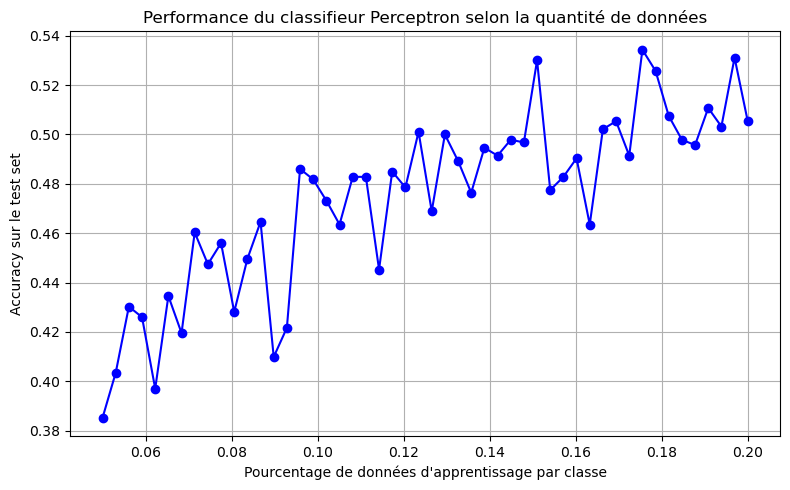

In [18]:
pourcentage = np.linspace(0.05,0.2,50)
perfs = []
for i in range(len(pourcentage)):
    print(i)
    # déclaration des variables qui seront initialisées dans la boucle:
    df_train_percep = []  
    df_test_percep = []
    for l in les_labels2:
        les_ids = newsgroups_df2[newsgroups_df2['target'] == l].index.to_list()
        np.random.shuffle(les_ids)
    
        nb_total = len(les_ids)
        nb_app = int(nb_total * pourcentage[i])
        nb_test = int(nb_total * taux_test)
    
        ids_app = les_ids[:nb_app]
        ids_test = les_ids[nb_app:nb_app + nb_test]
    
        df_train_percep.append(newsgroups_df2.loc[ids_app])
        df_test_percep.append(newsgroups_df2.loc[ids_test])
    
    df_train_percep = pd.concat(df_train_percep)
    df_test_percep = pd.concat(df_test_percep)

    X_train_percep = ut.df2array_tfidf(df_train_percep, index_mots2) # bag of words avec la méthode tf-idf
    X_test_percep = ut.df2array_tfidf(df_test_percep, index_mots2)
    
    Y_train_percep = df_train2["target"].to_numpy()
    Y_test_percep = df_test2["target"].to_numpy()

    perceptron2 = classif.ClassifierPerceptron(len(index_mots2),eps,init) # sans stopword
    multi_classes2 = classif.ClassifierMultiOAA(perceptron2)
    multi_classes2.train(X_train_percep,Y_train_percep)
    
    tic2 = time.time() 
    val_accuracy2 =  multi_classes2.accuracy(X_test_percep,Y_test_percep)
    toc2 = time.time()

    perfs.append(val_accuracy2)

plt.figure(figsize=(8,5))
plt.plot(pourcentage, perfs, marker='o', linestyle='-', color='blue')
plt.xlabel("Pourcentage de données d'apprentissage par classe")
plt.ylabel("Accuracy sur le test set")
plt.title("Performance du classifieur Perceptron selon la quantité de données")
plt.grid(True)
plt.tight_layout()
plt.savefig("courbe_perceptron.png")
plt.show()

## Arbre de décision

### BAG binaire

In [28]:
arbre_elections = classif.ClassifierArbreNumerique(len(index_mots), 0.8, index_mots)
arbre_elections.train(X_train_binaire, Y_train)

graphe_arbre = gv.Digraph(format='png')
arbre_elections.affiche(graphe_arbre)  # Remplit le graphe avec les nœuds/arcs

graphe_arbre.render(filename='arbre1_sw', directory='.', cleanup=True)


'arbre1_sw.png'

In [38]:
Y_pred = []
for x in X_test_binaire:
    Y_pred.append(arbre_elections.predict(x))

# Conversion en tableau numpy pour vectoriser la comparaison
Y_pred = np.array(Y_pred)

accuracy = np.mean(Y_pred == Y_test)
print("Accuracy de l’arbre :", accuracy)

Accuracy de l’arbre : 0.1427038626609442


In [31]:
arbre_elections2 = classif.ClassifierArbreNumerique(len(index_mots2), 0.8, index_mots2)
arbre_elections2.train(X_train_binaire2, Y_train2)

graphe_arbre2 = gv.Digraph(format='png')
arbre_elections2.affiche(graphe_arbre2)  # Remplit le graphe avec les nœuds/arcs

graphe_arbre2.render(filename='arbre1_sans_sw', directory='.', cleanup=True)


'arbre1_sans_sw.png'

In [40]:
Y_pred = []
for x in X_test_binaire2:
    Y_pred.append(arbre_elections2.predict(x))

# Conversion en tableau numpy pour vectoriser la comparaison
Y_pred = np.array(Y_pred)

accuracy = np.mean(Y_pred == Y_test2)
print("Accuracy de l’arbre :", accuracy)

Accuracy de l’arbre : 0.11373390557939914


### BAG Comptage

In [33]:
arbre_elections = classif.ClassifierArbreNumerique(len(index_mots), 0.8, index_mots)
arbre_elections.train(X_train_comptage,Y_train)

graphe_arbre = gv.Digraph(format='png')
arbre_elections.affiche(graphe_arbre)  # Remplit le graphe avec les nœuds/arcs

graphe_arbre.render(filename='arbre2_sw', directory='.', cleanup=True)


'arbre2_sw.png'

In [45]:
Y_pred = []

for x in X_test_comptage:
    Y_pred.append(arbre_elections.predict(x))

# Conversion en tableau numpy pour vectoriser la comparaison
Y_pred = np.array(Y_pred)

accuracy = np.mean(Y_pred == Y_test)
print("Accuracy de l’arbre :", accuracy)

Accuracy de l’arbre : 0.14377682403433475


In [46]:
arbre_elections2 = classif.ClassifierArbreNumerique(len(index_mots2), 0.8, index_mots2)
arbre_elections2.train(X_train_comptage2,Y_train2)

graphe_arbre2 = gv.Digraph(format='png')
arbre_elections2.affiche(graphe_arbre2)  # Remplit le graphe avec les nœuds/arcs

graphe_arbre2.render(filename='arbre2_sans_sw', directory='.', cleanup=True)


'arbre2_sans_sw.png'

In [47]:
Y_pred = []

for x in X_test_comptage2:
    Y_pred.append(arbre_elections2.predict(x))

# Conversion en tableau numpy pour vectoriser la comparaison
Y_pred = np.array(Y_pred)

accuracy = np.mean(Y_pred == Y_test2)
print("Accuracy de l’arbre :", accuracy)

Accuracy de l’arbre : 0.1255364806866953


### Frequence

In [48]:
arbre_elections = classif.ClassifierArbreNumerique(len(index_mots), 0.8, index_mots)
arbre_elections.train(X_train_freq,Y_train)

graphe_arbre = gv.Digraph(format='png')
arbre_elections.affiche(graphe_arbre)  # Remplit le graphe avec les nœuds/arcs

graphe_arbre.render(filename='arbre3_sw', directory='.', cleanup=True)


'arbre3_sw.png'

In [49]:
Y_pred = []

for x in X_test_freq:
    Y_pred.append(arbre_elections.predict(x))

# Conversion en tableau numpy pour vectoriser la comparaison
Y_pred = np.array(Y_pred)

accuracy = np.mean(Y_pred == Y_test)
print("Accuracy de l’arbre :", accuracy)

Accuracy de l’arbre : 0.12017167381974249


In [50]:
arbre_elections2 = classif.ClassifierArbreNumerique(len(index_mots2), 0.8, index_mots2)
arbre_elections2.train(X_train_freq2,Y_train2)

graphe_arbre2 = gv.Digraph(format='png')
arbre_elections2.affiche(graphe_arbre2)  # Remplit le graphe avec les nœuds/arcs

graphe_arbre2.render(filename='arbre3_sans_sw', directory='.', cleanup=True)


'arbre3_sans_sw.png'

In [51]:
Y_pred = []

for x in X_test_freq2:
    Y_pred.append(arbre_elections2.predict(x))

# Conversion en tableau numpy pour vectoriser la comparaison
Y_pred = np.array(Y_pred)

accuracy = np.mean(Y_pred == Y_test2)
print("Accuracy de l’arbre :", accuracy)

Accuracy de l’arbre : 0.09334763948497854


### TF-IDF

In [52]:
arbre_elections = classif.ClassifierArbreNumerique(len(index_mots), 0.8, index_mots)
arbre_elections.train(X_train_tfidf,Y_train)

graphe_arbre = gv.Digraph(format='png')
arbre_elections.affiche(graphe_arbre)  # Remplit le graphe avec les nœuds/arcs

graphe_arbre.render(filename='arbre4_sw', directory='.', cleanup=True)


'arbre4_sw.png'

In [53]:
Y_pred = []

for x in X_test_tfidf:
    Y_pred.append(arbre_elections.predict(x))

# Conversion en tableau numpy pour vectoriser la comparaison
Y_pred = np.array(Y_pred)

accuracy = np.mean(Y_pred == Y_test)
print("Accuracy de l’arbre :", accuracy)

Accuracy de l’arbre : 0.12017167381974249


In [54]:
arbre_elections2 = classif.ClassifierArbreNumerique(len(index_mots2), 0.8, index_mots2)
arbre_elections2.train(X_train_tfidf2,Y_train2)

graphe_arbre2 = gv.Digraph(format='png')
arbre_elections2.affiche(graphe_arbre2)  # Remplit le graphe avec les nœuds/arcs

graphe_arbre2.render(filename='arbre4_sans_sw', directory='.', cleanup=True)


'arbre4_sans_sw.png'

In [55]:
Y_pred = []

for x in X_test_tfidf2:
    Y_pred.append(arbre_elections2.predict(x))

# Conversion en tableau numpy pour vectoriser la comparaison
Y_pred = np.array(Y_pred)

accuracy = np.mean(Y_pred == Y_test2)
print("Accuracy de l’arbre :", accuracy)

Accuracy de l’arbre : 0.09012875536480687


## Apprentissage non supervisé